# Graphes - énoncé

Ce notebook introduit [matplotlib](http://matplotlib.org/) et d'autres modules Python qui permettent de tracer des graphes et bâtis sur la même logique que matplotlib.

Pour avoir des graphiques inclus dans le notebook, il faut ajouter cette ligne et l'exécuter en premier.

In [ ]:
%matplotlib inline

On change le style pour un style plus moderne, celui de [ggplot](http://ggplot2.org/) :

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Données

Pour tous les exemples qui suivent, on utilise les résultat [élection présidentielle de 2012](https://www.data.gouv.fr/fr/datasets/election-presidentielle-2012-resultats-572124/). Si vous n'avez pas le module [actuariat_python](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/index.html), il vous suffit de recopier le code de la fonction [elections_presidentielles](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/_modules/actuariat_python/data/elections.html#elections_presidentielles) qui utilise la fonction [read_excel](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html).
La fonction utilise des données stockées localement afin que le code ci-dessous fonctionne toujours même si le format des données change sur le site *data.gouv.fr*.

In [ ]:
from actuariat_python.data import elections_presidentielles
dict_df = elections_presidentielles(local=True, agg="dep")

In [ ]:
list(dict_df.keys())

['dep1', 'circ1', 'dep2', 'circ2']

In [ ]:
dict_df["dep1"].head()

,Code du département,Libellé du département,Code de la circonscription,Inscrits,Votants,Exprimés,Blancs et nuls,Nathalie ARTHAUD (LO),Philippe POUTOU (NPA),Jean-Luc MELENCHON (FG),François HOLLANDE (PS),Eva JOLY (EELV),François BAYROU (MODEM),Nicolas SARKOZY (UMP),Nicolas DUPONT-AIGNAN (DLR),Marine LE PEN (FN),Jacques CHEMINADE (SP)
0,1,AIN,15,393808,327812,321359,6453,1794,3323,30898,73096,7268,32650,97722,7208,66540,860
1,2,AISNE,15,376068,303140,297944,5196,2490,3860,30360,80751,3455,19895,72090,5853,78452,738
2,3,ALLIER,6,256275,211009,205950,5059,1482,2584,27969,61131,3232,17814,49477,4068,37736,457
3,4,ALPES-DE-HAUTE-PROVENCE,3,123933,102899,100788,2111,487,1394,15269,24551,2933,7483,25668,1845,20875,283
4,5,HAUTES-ALPES,3,106865,88619,86777,1842,488,1152,12175,21248,3147,8559,22655,1782,15359,212


In [ ]:
dict_df["dep2"].head()

,Code du département,Libellé du département,Code de la circonscription,Inscrits,Votants,Exprimés,Blancs et nuls,François HOLLANDE (PS),Nicolas SARKOZY (UMP)
0,979,SAINT-BARTHELEMY et SAINT-MARTIN,1,22686,9907,9492,415,3851,5641
1,01,AIN,15,393866,326587,307074,19513,131333,175741
2,02,AISNE,15,376073,302076,281020,21056,147260,133760
3,03,ALLIER,6,256211,211132,196208,14924,111615,84593
4,04,ALPES-DE-HAUTE-PROVENCE,3,123895,103581,96942,6639,49498,47444


On corrige le code du département ``01`` --> ``1``.

In [ ]:
def cleandep(s):
    if isinstance(s, str):
         r = s.lstrip('0')
    else:
        r = str(s)
    return r
dict_df["dep1"]["Code du département"] = dict_df["dep1"]["Code du département"].apply(cleandep)
dict_df["dep2"]["Code du département"] = dict_df["dep2"]["Code du département"].apply(cleandep)

In [ ]:
deps = dict_df["dep1"].merge(dict_df["dep2"], 
                                       on="Code du département",
                                       suffixes=("T1", "T2"))
deps.columns

Index(['Code du département', 'Libellé du départementT1',
       'Code de la circonscriptionT1', 'InscritsT1', 'VotantsT1', 'ExprimésT1',
       'Blancs et nulsT1', 'Nathalie ARTHAUD (LO)', 'Philippe POUTOU (NPA)',
       'Jean-Luc MELENCHON (FG)', 'François HOLLANDE (PS)T1',
       'Eva JOLY (EELV)', 'François BAYROU (MODEM)', 'Nicolas SARKOZY (UMP)T1',
       'Nicolas DUPONT-AIGNAN (DLR)', 'Marine LE PEN (FN)',
       'Jacques CHEMINADE (SP)', 'Libellé du départementT2',
       'Code de la circonscriptionT2', 'InscritsT2', 'VotantsT2', 'ExprimésT2',
       'Blancs et nulsT2', 'François HOLLANDE (PS)T2',
       'Nicolas SARKOZY (UMP)T2'],
      dtype='object')

In [ ]:
deps["rHollandeT1"] = deps['François HOLLANDE (PS)T1'] / (deps["VotantsT1"] - deps["Blancs et nulsT1"])
deps["rSarkozyT1"] = deps['Nicolas SARKOZY (UMP)T1'] / (deps["VotantsT1"] - deps["Blancs et nulsT1"])
deps["rNulT1"] = deps["Blancs et nulsT1"] / deps["VotantsT1"]
deps["rHollandeT2"] = deps["François HOLLANDE (PS)T2"] / (deps["VotantsT2"] - deps["Blancs et nulsT2"])
deps["rSarkozyT2"] = deps['Nicolas SARKOZY (UMP)T2'] / (deps["VotantsT2"] - deps["Blancs et nulsT2"])
deps["rNulT2"] = deps["Blancs et nulsT2"] / deps["VotantsT2"]
data = deps[["Code du département", "Libellé du départementT1", 
             "VotantsT1", "rHollandeT1", "rSarkozyT1", "rNulT1",
             "VotantsT2", "rHollandeT2", "rSarkozyT2", "rNulT2"]]
data_elections = data # parfois data est remplacé dans la suite
data.head()

,Code du département,Libellé du départementT1,VotantsT1,rHollandeT1,rSarkozyT1,rNulT1,VotantsT2,rHollandeT2,rSarkozyT2,rNulT2
0,1,AIN,327812,0.227459,0.304090,0.019685,326587,0.427692,0.572308,0.059748
1,2,AISNE,303140,0.271027,0.241958,0.017141,302076,0.524020,0.475980,0.069704
2,3,ALLIER,211009,0.296824,0.240238,0.023975,211132,0.568861,0.431139,0.070686
3,4,ALPES-DE-HAUTE-PROVENCE,102899,0.243591,0.254673,0.020515,103581,0.510594,0.489406,0.064095
4,5,HAUTES-ALPES,88619,0.244858,0.261071,0.020786,89405,0.508935,0.491065,0.067390


In [ ]:
deps.to_excel("deps.xlsx")
dict_df["dep1"].to_excel("T1.xlsx")
dict_df["dep2"].to_excel("T2.xlsx")

## De pandas à matplotlib

Lorsqu'on construit un graphique avec des données stockées dans un [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), on suit généralement le processus suivant :

* Voir si un graphique correspond dans la page [visualisation](http://pandas.pydata.org/pandas-docs/stable/visualization.html) de pandas
* Voir la [gallerie](http://matplotlib.org/gallery.html) de [matplotlib](http://matplotlib.org/index.html)
* Chercher un exemple de graphique sur un moteur de recherche pour tomber sur une page comme celle-ci [Using Python libraries to plot two horizontal bar charts sharing same y axis](http://stackoverflow.com/questions/27694221/using-python-libraries-to-plot-two-horizontal-bar-charts-sharing-same-y-axis)
* Assembler différentes sources

### plot

La méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot) permet de faire la plupart des graphiques standards (voir [Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html)).

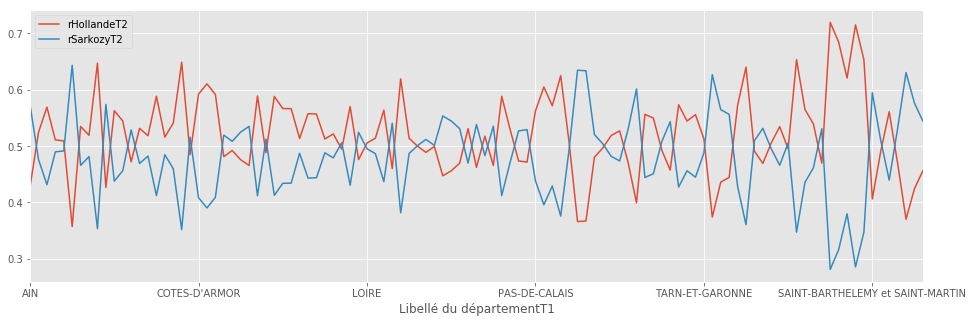

In [ ]:
data.plot(x="Libellé du départementT1", y=["rHollandeT2", "rSarkozyT2"], figsize=(16,5))

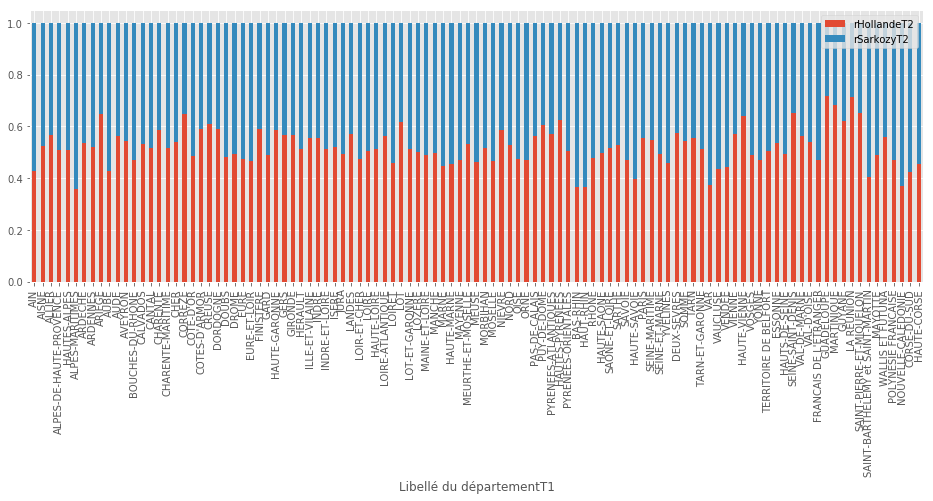

In [ ]:
data.plot(x="Libellé du départementT1", y=["rHollandeT2", "rSarkozyT2"], figsize=(16,5), kind="bar", stacked=True)

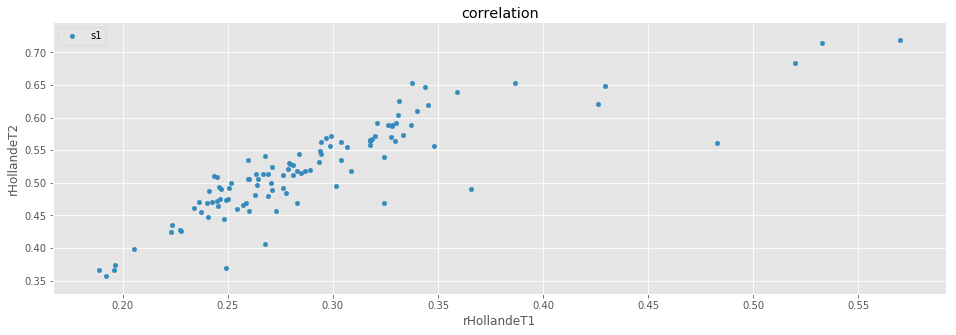

In [ ]:
data.plot(x="rHollandeT1", y="rHollandeT2", figsize=(16,5), kind="scatter", label="s1", title="correlation")

### superposition

La méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot) retourne un objet de type [Axes](http://matplotlib.org/api/axes_api.html). On peut superposer plusieurs courbes sur le même graphique en s'assurant que la seconde courbe utilise le même objet.

<class 'matplotlib.axes._subplots.AxesSubplot'>


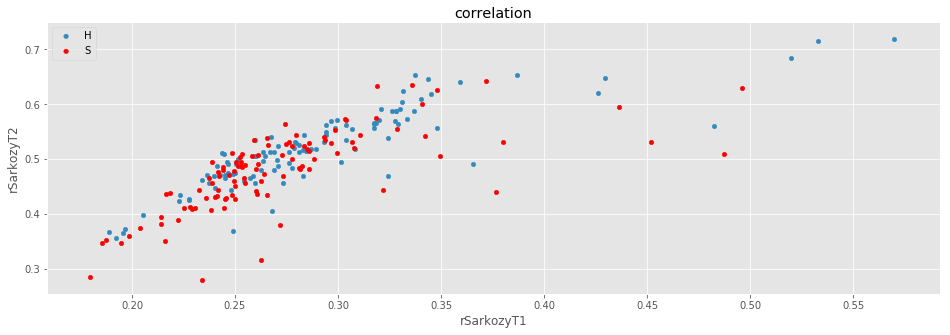

In [ ]:
ax = data.plot(x="rHollandeT1", y="rHollandeT2", figsize=(16,5), kind="scatter", label="H", title="correlation")
print(type(ax))
data.plot(x="rSarkozyT1", y="rSarkozyT2", kind="scatter", label="S", ax=ax, c="red")

On ajoute une ligne avec la méthode [Axes.plot](http://matplotlib.org/api/axes_api.html?highlight=plot#matplotlib.axes.Axes.plot) ou du text avec [text](http://matplotlib.org/api/text_api.html#matplotlib.text.Text) :

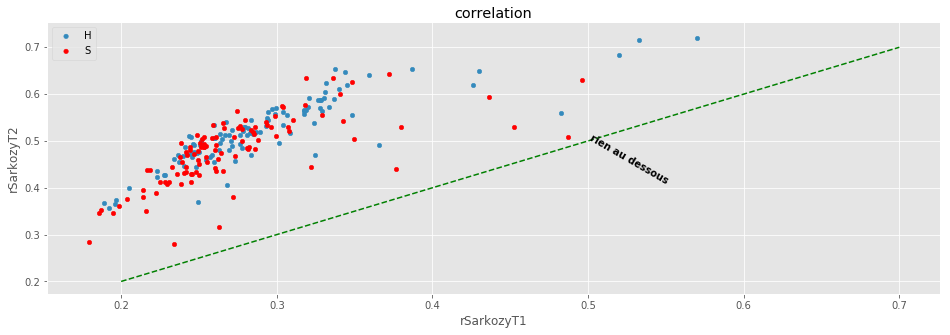

In [ ]:
ax = data.plot(x="rHollandeT1", y="rHollandeT2", figsize=(16,5), kind="scatter", label="H", title="correlation")
data.plot(x="rSarkozyT1", y="rSarkozyT2", kind="scatter", label="S", ax=ax, c="red")
ax.plot([0.2,0.7], [0.2,0.7], "g--")
ax.text(0.5, 0.5, "rien au dessous", weight="bold", rotation="-30")

### plusieurs graphes sur la même figure

*pandas* crée une [Figure](http://matplotlib.org/api/pyplot_api.html?highlight=figure#matplotlib.pyplot.figure) de façon implicite avec un seul graphe. Pour créer plusieurs graphes, il faut créer ce type d'objet en précisant qu'il y aura plusieurs [Axes](http://matplotlib.org/api/axes_api.html) avec la fonction [subplots](http://matplotlib.org/api/pyplot_api.html?highlight=figure#matplotlib.pyplot.subplots) et les transmettre à *pandas*. On peut également partager l'axe des X ou l'axe des Y.

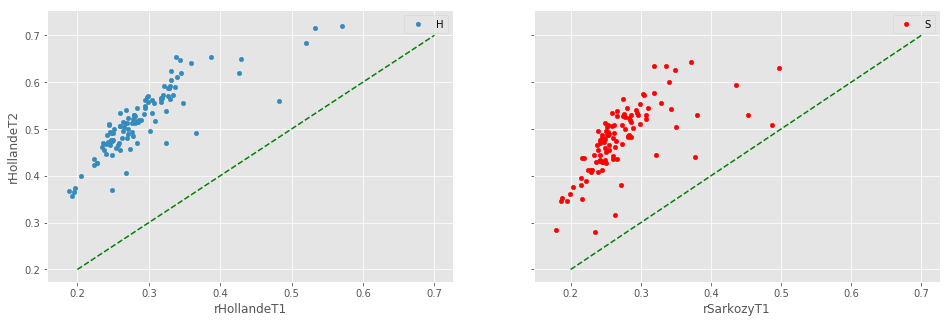

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)
data.plot(x="rHollandeT1", y="rHollandeT2", figsize=(16,5), kind="scatter", label="H", ax=axes[0])
data.plot(x="rSarkozyT1", y="rSarkozyT2", kind="scatter", label="S", ax=axes[1], c="red")
axes[0].plot([0.2,0.7], [0.2,0.7], "g--")
axes[1].plot([0.2,0.7], [0.2,0.7], "g--")

### matplolib sans pandas

On peut se passer de pandas et s'inspirer d'un graphe de la gallerie pour ajouter des points dépendants du nombre de votants [scatter_demo](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) et ajouter une légende manuellement avec la méthode [legend](http://matplotlib.org/api/axes_api.html?highlight=legend#matplotlib.axes.Axes.legend).

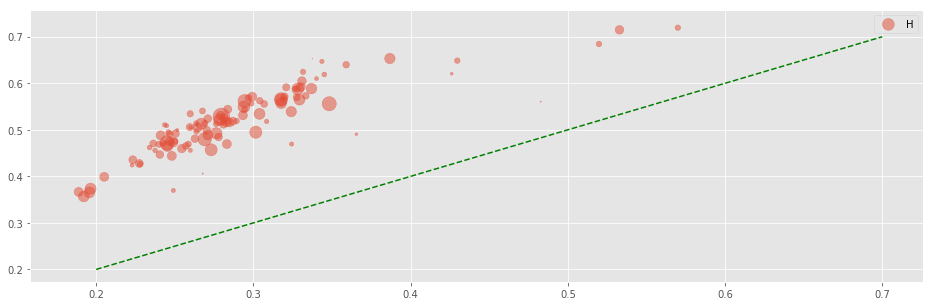

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(16,5))
c = axes.scatter(x=data["rHollandeT1"], 
            y=data["rHollandeT2"], 
            s=data["VotantsT1"]/5000, alpha=0.5)
axes.plot([0.2,0.7], [0.2,0.7], "g--")
axes.legend( (c,), ("H",) )

## Pandas et graphes prêts à l'emploi

### histogrammes

avec [hist](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html?highlight=hist#pandas.DataFrame.hist)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AE2071E48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000017AE2522978>]], dtype=object)

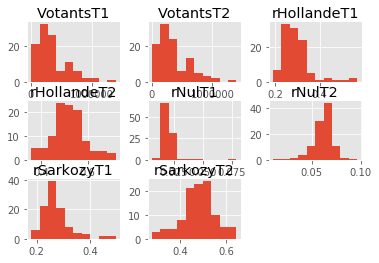

In [ ]:
data.hist()

Le paramètre *figsize* permettrait de modifier la taille du graphique.

### correlations

avec [scatter_matrix](http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017AE22F3780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000017AE47C3A20>]], dtype=object)

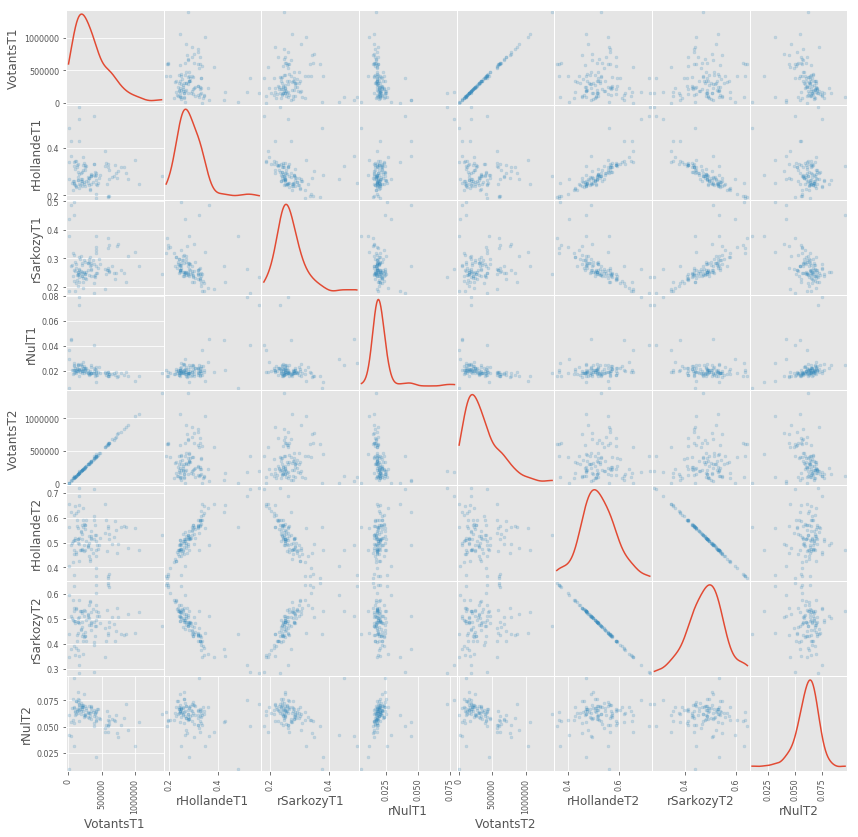

In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(14, 14), diagonal='kde')

## cartes avec basemap

Je recommande la lecture de ce tutoriel [Visualization: Mapping Global Earthquake Activity](http://introtopython.org/visualization_earthquakes.html). Les exemples se font avec le module [basemap](http://matplotlib.org/basemap/). Les coordonnées sur une carte se font avec des [coordonnées géographiques](https://fr.wikipedia.org/wiki/Coordonn%C3%A9es_g%C3%A9ographiques) : longitude et latitude. La distance entre deux lieux géographiques se calcule grâce à la [distance de Haversine](https://en.wikipedia.org/wiki/Haversine_formula).

Alternative à basemap : [cartopy](http://scitools.org.uk/cartopy/).

### une carte simple

On la choisit centrée sur la France. On crée la carte à l'aide de l'objet [Basemap](http://matplotlib.org/basemap/api/basemap_api.html?highlight=basemap#mpl_toolkits.basemap.Basemap). Comme elle accepte un argument ``ax``, il est possible de changer sa taille ou de la juxtaposer à côté d'un autre graphe. Les couleurs peuvent être être décrite en hexadécimale ``#RRVVBB`` (rouge, vert, bleu) ou on peut utiliser la palette des [couleurs](http://www.python-simple.com/img/img36.png).

c:\python35_x64\lib\site-packages\mpl_toolkits\basemap\__init__.py:1775: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


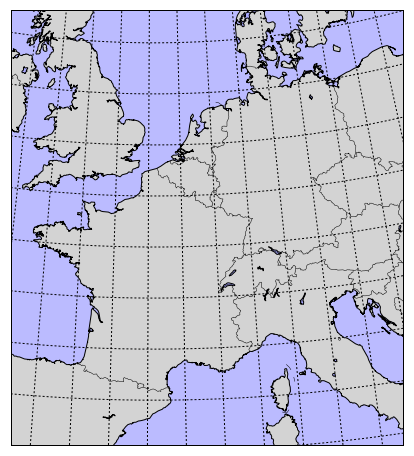

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(8,8))

m = Basemap(llcrnrlon=-5,llcrnrlat=40,urcrnrlon=20,urcrnrlat=56,
            resolution='i',projection='cass',lon_0=2.34,lat_0=48,
           ax=axes)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey', lake_color='#AAAAFF')

m.drawparallels(numpy.arange(-40,61.,2.))
m.drawmeridians(numpy.arange(-20.,21.,2.))
m.drawmapboundary(fill_color='#BBBBFF')

### exercice 1 : centrer la carte de la France

### ajouter du texte ou une marque

Sur une carte, on veut la plupart du temps ajouter du texte. On reprend le début de ce code qu'on place dans une fonction, puis on place Paris. On utilise pour cela les fonctions standard de *matplotlib* mais on convertit les coordonnées géographiques en coordonnées relatives au graphe (donc dans un repère différent).

In [ ]:
def carte_france():
    from mpl_toolkits.basemap import Basemap
    import numpy

    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1, 1, figsize=(8,8))

    m = Basemap(llcrnrlon=-5,llcrnrlat=40,urcrnrlon=20,urcrnrlat=56,
                resolution='i',projection='cass',lon_0=2.34,lat_0=48,
               ax=axes)
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='lightgrey', lake_color='#AAAAFF')

    m.drawparallels(numpy.arange(-40,61.,2.))
    m.drawmeridians(numpy.arange(-20.,21.,2.))
    m.drawmapboundary(fill_color='#BBBBFF')
    return m, axes

c:\python35_x64\lib\site-packages\mpl_toolkits\basemap\__init__.py:1775: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


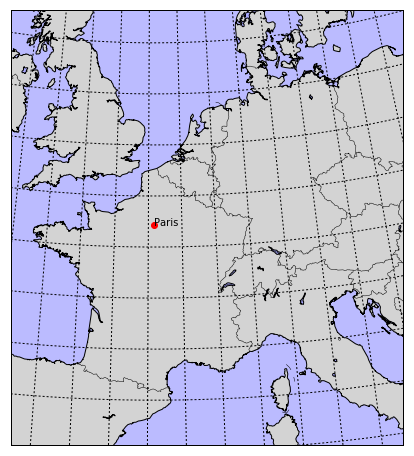

In [ ]:
import matplotlib.pyplot as plt

m, ax = carte_france()

lon = 2.3488000
lat = 48.853410
x,y = m(lon, lat)  # la conversion opère ici
m.plot(x, y, 'ro', markersize=6)
ax.text(x, y, "Paris")

On connaît rarement les coordonnées de chaque ville mais un moteur de recherche donne rapidement des pistes pour trouver ces données. Il faut néanmoins s'assurer que le licence autorise ce qu'on l'intention de faire avec :

[Liste des villes de France en SQL, CSV ou XML](http://sql.sh/736-base-donnees-villes-francaises)

In [ ]:
import pyensae
pyensae.download_data("villes_france.csv", url="http://sql.sh/ressources/sql-villes-france/")

'villes_france.csv'

In [ ]:
cols = ["ncommune", "numero_dep", "slug", "nom", "nom_simple", "nom_reel", "nom_soundex", "nom_metaphone", "code_postal",
    "numero_commune", "code_commune", "arrondissement", "canton", "pop2010", "pop1999", "pop2012",
    "densite2010", "surface", "superficie", "dlong", "dlat", "glong", "glat", "slong", "slat", "alt_min", "alt_max"]
import pandas
df = pandas.read_csv("villes_france.csv", header=None,low_memory=False, names=cols)

In [ ]:
df.head()

,ncommune,numero_dep,slug,nom,nom_simple,nom_reel,nom_soundex,nom_metaphone,code_postal,numero_commune,...,surface,superficie,dlong,dlat,glong,glat,slong,slat,alt_min,alt_max
0,1,01,ozan,OZAN,ozan,Ozan,O250,OSN,01190,284,...,93,6.60,4.91667,46.3833,2866.0,51546.0,45456.0,462330.0,170.0,205.0
1,2,01,cormoranche-sur-saone,CORMORANCHE-SUR-SAONE,cormoranche sur saone,Cormoranche-sur-Saône,C65652625,KRMRNXSRSN,01290,123,...,107,9.85,4.83333,46.2333,2772.0,51379.0,44953.0,461427.0,168.0,211.0
2,3,01,plagne-01,PLAGNE,plagne,Plagne,P425,PLKN,01130,298,...,20,6.20,5.73333,46.1833,3769.0,51324.0,54342.0,461131.0,560.0,922.0
3,4,01,tossiat,TOSSIAT,tossiat,Tossiat,T230,TST,01250,422,...,138,10.17,5.31667,46.1333,3309.0,51268.0,51854.0,460828.0,244.0,501.0
4,5,01,pouillat,POUILLAT,pouillat,Pouillat,P430,PLT,01250,309,...,14,6.23,5.43333,46.3333,3435.0,51475.0,52542.0,461938.0,333.0,770.0


### exercice 2 : placer les plus grandes villes de France sur la carte

### départements

Pour dessiner des formes sur une carte, il faut connaître les coordonnées de ces formes. L'article suivant [Matplotlib Basemap tutorial 10: Shapefiles Unleached, continued](http://www.geophysique.be/2013/02/12/matplotlib-basemap-tutorial-10-shapefiles-unleached-continued/) permet de dessiner les départements belges. On va s'en inspirer pour dessiner les départements français. La première chose à faire est de récupérer des données géographiques. Une façon simple de les trouver est d'utiliser un moteur de recherche avec le mot clé **shapefile** inclus dedans : c'est le format du fichier. *shapefile france* permet d'obtenir quelques sources. En voici d'autres :

* [GADM](http://www.gadm.org/) : database of Global Administrative Areas
* [OpenData.gouv commune](https://www.data.gouv.fr/fr/datasets/geofla-communes/) : base de données sur data.gouv.fr
* [The National Map Small-Scale Collection](http://nationalmap.gov/small_scale/#chpbound) : Etats-Unis
* [ArcGIS](https://developers.arcgis.com/javascript/jsapi/esri.basemaps-amd.html) : API Javascripts
* [Natural Earth](http://www.naturalearthdata.com/) : Natural Earth is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software.
* [thematicmapping](http://thematicmapping.org/downloads/world_borders.php) : World Borders Dataset
* [OpenStreetMap Data Extracts](http://download.geofabrik.de/) : OpenStreetMap data
* [OpenStreetMapData](http://openstreetmapdata.com/) : OpenStreetMap data
* [Shapefile sur Wikipedia](http://wiki.openstreetmap.org/wiki/Shapefiles) : contient divers liens vers des sources de données

La première chose à vérifier est la licence associées aux données : on ne peut pas en faire ce qu'on veut. Pour cet exemple, j'ai choisi la première source de données, GADM. La licence n'est pas précisée explicitement (on peut trouver *happy to share* sur le site, la page wikipedia [GADM](https://en.wikipedia.org/wiki/GADM) précise : *GADM is not freely available for commercial use. The GADM project created the spatial data for many countries from spatial databases provided by national governments, NGO, and/or from maps and lists of names available on the Internet (e.g. from Wikipedia).* C'est le choix que j'avais fait en 2015 mais l'accès à ces bases a probablement changé car l'accès est restreint. J'ai donc opté pour les bases accessibles depuis [data.gouv.fr](https://www.data.gouv.fr/fr/datasets/geofla-departements-30383060/). Leur seul inconvénient est que les coordonnées sont exprimées dans une projection de type [Lambert 93](https://fr.wikipedia.org/wiki/Projection_conique_conforme_de_Lambert). Cela nécessite une conversion.

In [ ]:
from pyensae import download_data
try:
    download_data("GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z",
                  website="https://wxs-telechargement.ign.fr/oikr5jryiph0iwhw36053ptm/telechargement/inspire/" + \
                          "GEOFLA_THEME-DEPARTEMENTS_2015_2$GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01/file/")
except Exception as e:
    # au cas le site n'est pas accessible
    download_data("GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z", website="xd")

In [ ]:
from pyquickhelper.filehelper import un7zip_files
un7zip_files("GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z", where_to="shapefiles")

['shapefiles\\GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01\\GEOFLA\\3_METADONNEES_PRODUIT\\IGNF_GEOFLAr_2-1.xml',
 'shapefiles\\GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01\\GEOFLA\\3_METADONNEES_PRODUIT\\IGNF_GEOFLAr_2-1.html',
 'shapefiles\\GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01\\GEOFLA\\4_METADONNEES_LIVRAISON_2015\\GEOFLA_2-1_SHP_LAMB93_FR-ED152\\LISEZ-MOI.txt',
 'shapefiles\\GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01\\GEOFLA\\5_SUPPLEMENTS_LIVRAISON_2015\\GEOFLA_2-1_SHP_LAMB93_FR-ED152\\LISEZ_MOI.TXT',
 'shapefiles\\GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01\\GEOFLA\\2_DESCRIPTIFS_PRODUIT\\DC_GEOFLA_2-1.pdf',
 'shapefiles\\GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01\\GEOFLA\\2_DESCRIPTIFS_PRODUIT\\DL_vecteur.pdf',
 'shapefiles\\GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01\\GEOFLA\\2_DESCRIPTIFS_PRODUIT\\Supplements_Gratuits.pdf',
 'shapefiles\\GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01\\GEOFLA\\1_DONNEES_LIVRAISON_2015\\GEOFLA_2-1_SHP_L

La license accompagne les données : *ce produit est téléchargeable et utilisable gratuitement sous licence [Etalab](https://www.etalab.gouv.fr/licence-ouverte-open-licence)*. Pour un usage commercial, il faut faire attentation à la license associée aux données. Le seul inconvénient des données *GEOFLA* est que certaines sont données dans le système de coordonnées [Lambert 93](https://fr.wikipedia.org/wiki/Projection_conique_conforme_de_Lambert) (voir aussi [Cartographie
avec R](https://www.sylvaindurand.org/cartographie-avec-R/)).

In [ ]:
shp = 'shapefiles\\GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01\\GEOFLA\\1_DONNEES_LIVRAISON_2015\\' + \
      'GEOFLA_2-1_SHP_LAMB93_FR-ED152\\DEPARTEMENT\\DEPARTEMENT.shp'
import shapefile
r = shapefile.Reader(shp)
shapes = r.shapes()
records = r.records()
len(shapes), len(records)

(96, 96)

In [ ]:
r.bbox

[99217.1, 6049646.300000001, 1242417.2, 7110480.100000001]

On regarde une zone en particulier mais on réduit la quantité de données affichées :

In [ ]:
d = shapes[0].__dict__.copy()
d["points"] = d["points"][:10]
d

{'bbox': [688654.4, 6690595.300000001, 800332.3, 6811114.5],
 'parts': [0],
 'points': [(701742.0, 6751181.100000001),
  (701651.9, 6751166.9),
  (701552.0, 6751162.7),
  (700833.7000000001, 6751313.7),
  (700669.4, 6751380.0),
  (700475.4, 6751476.600000001),
  (700400.7000000001, 6751517.2),
  (700098.3, 6751789.600000001),
  (699993.8, 6751845.4),
  (699874.1000000001, 6751876.4)],
 'shapeType': 5}

350 départements, sûr ?

In [ ]:
records[0], records[1]

(['DEPARTEM0000000000000004',
  '89',
  'YONNE',
  '024',
  'AUXERRE',
  742447,
  6744261,
  748211,
  6750855,
  '27',
  'BOURGOGNE-FRANCHE-COMTE'],
 ['DEPARTEM0000000000000028',
  '69',
  'RHONE',
  '381',
  'LYON',
  842221,
  6520526,
  832095,
  6530600,
  '84',
  'AUVERGNE-RHONE-ALPES'])

In [ ]:
len(set([r[6] for r in records]))

96

Puis je récupère le code final (toujours à [Matplotlib Basemap tutorial 10: Shapefiles Unleached, continued](http://www.geophysique.be/2013/02/12/matplotlib-basemap-tutorial-10-shapefiles-unleached-continued/)) en l'adaptant pour la France. Petite astuce, on utilie la fonction [lambert932WGPS](https://github.com/sdpython/ensae_teaching_cs/blob/master/src/ensae_teaching_cs/helpers/geo_helper.py) du module [ensae_teaching_cs](http://www.xavierdupre.fr/app/ensae_teaching_cs/). On recopie le code ici :

In [ ]:
import math


def lambert932WGPS(lambertE, lambertN):

    class constantes:
        GRS80E = 0.081819191042816
        LONG_0 = 3
        XS = 700000
        YS = 12655612.0499
        n = 0.7256077650532670
        C = 11754255.4261

    delX = lambertE - constantes.XS
    delY = lambertN - constantes.YS
    gamma = math.atan(-delX / delY)
    R = math.sqrt(delX * delX + delY * delY)
    latiso = math.log(constantes.C / R) / constantes.n
    sinPhiit0 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * math.sin(1)))
    sinPhiit1 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit0))
    sinPhiit2 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit1))
    sinPhiit3 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit2))
    sinPhiit4 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit3))
    sinPhiit5 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit4))
    sinPhiit6 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit5))

    longRad = math.asin(sinPhiit6)
    latRad = gamma / constantes.n + constantes.LONG_0 / 180 * math.pi

    longitude = latRad / math.pi * 180
    latitude = longRad / math.pi * 180

    return longitude, latitude

lambert932WGPS(99217.1, 6049646.300000001), lambert932WGPS(1242417.2, 7110480.100000001)

((-4.1615802638173065, 41.303505287589545),
 (10.699505053975292, 50.85243395553585))

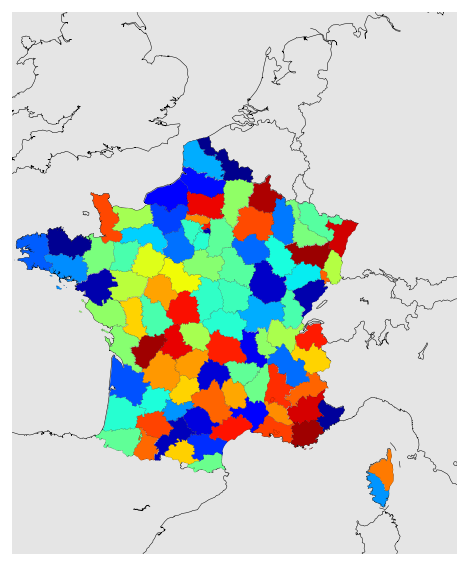

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
 
fig = plt.figure(figsize=(20,10))
#Custom adjust of the subplots
#plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)
#Let's create a basemap of Europe
x1 = -5.0
x2 = 12.
y1 = 40.
y2 = 54.
 
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
if False:
    # provoque l'erreur 
    # ValueError: All values in the dash list must be positive
    m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',
                    dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw parallels
    m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',
                    dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw meridians
 
from matplotlib.collections import LineCollection
from matplotlib import cm
import shapefile
 
shp = 'shapefiles\\GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01\\GEOFLA\\1_DONNEES_LIVRAISON_2015\\' + \
      'GEOFLA_2-1_SHP_LAMB93_FR-ED152\\DEPARTEMENT\\DEPARTEMENT.shp'
r = shapefile.Reader(shp)
shapes = r.shapes()
records = r.records()
 
for record, shape in zip(records,shapes):
    # les coordonnées sont en Lambert 93
    geo_points = [lambert932WGPS(x,y) for x, y in shape.points]
    lons = [_[0] for _ in geo_points]
    lats = [_[1] for _ in geo_points]
    data = np.array(m(lons, lats)).T
 
    if len(shape.parts) == 1:
        segs = [data,]
    else:
        segs = []
        for i in range(1,len(shape.parts)):
            index = shape.parts[i-1]
            index2 = shape.parts[i]
            segs.append(data[index:index2])
        segs.append(data[index2:])
 
    lines = LineCollection(segs,antialiaseds=(1,))
    # pour changer les couleurs c'est ici, il faudra utiliser le champ records
    # pour les changer en fonction du nom du départements
    lines.set_facecolors(cm.jet(np.random.rand(1)))
    lines.set_edgecolors('k')
    lines.set_linewidth(0.1)
    ax.add_collection(lines)

### exercice 3 : résultats des élections par départements

Ce n'est pas toujours évident !

## seaborn

[seaborn](http://stanford.edu/~mwaskom/software/seaborn/) propose des graphiques inéressants pour un statisticien. La [gallerie](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html) en donne un bon aperçu. On retravaille peu les graphiques. Le code suivant montre les corrélations entre variables [pairplot](http://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_matrix.html).

**warning** les warnings sont la plupart du temps dûs au fait que *seaborn* a été testé sur une version antérieure d'une de ses dépendances comme *matplotlib* et qu'il n'est pas encore à jour pour tenir compte des derniers développement.

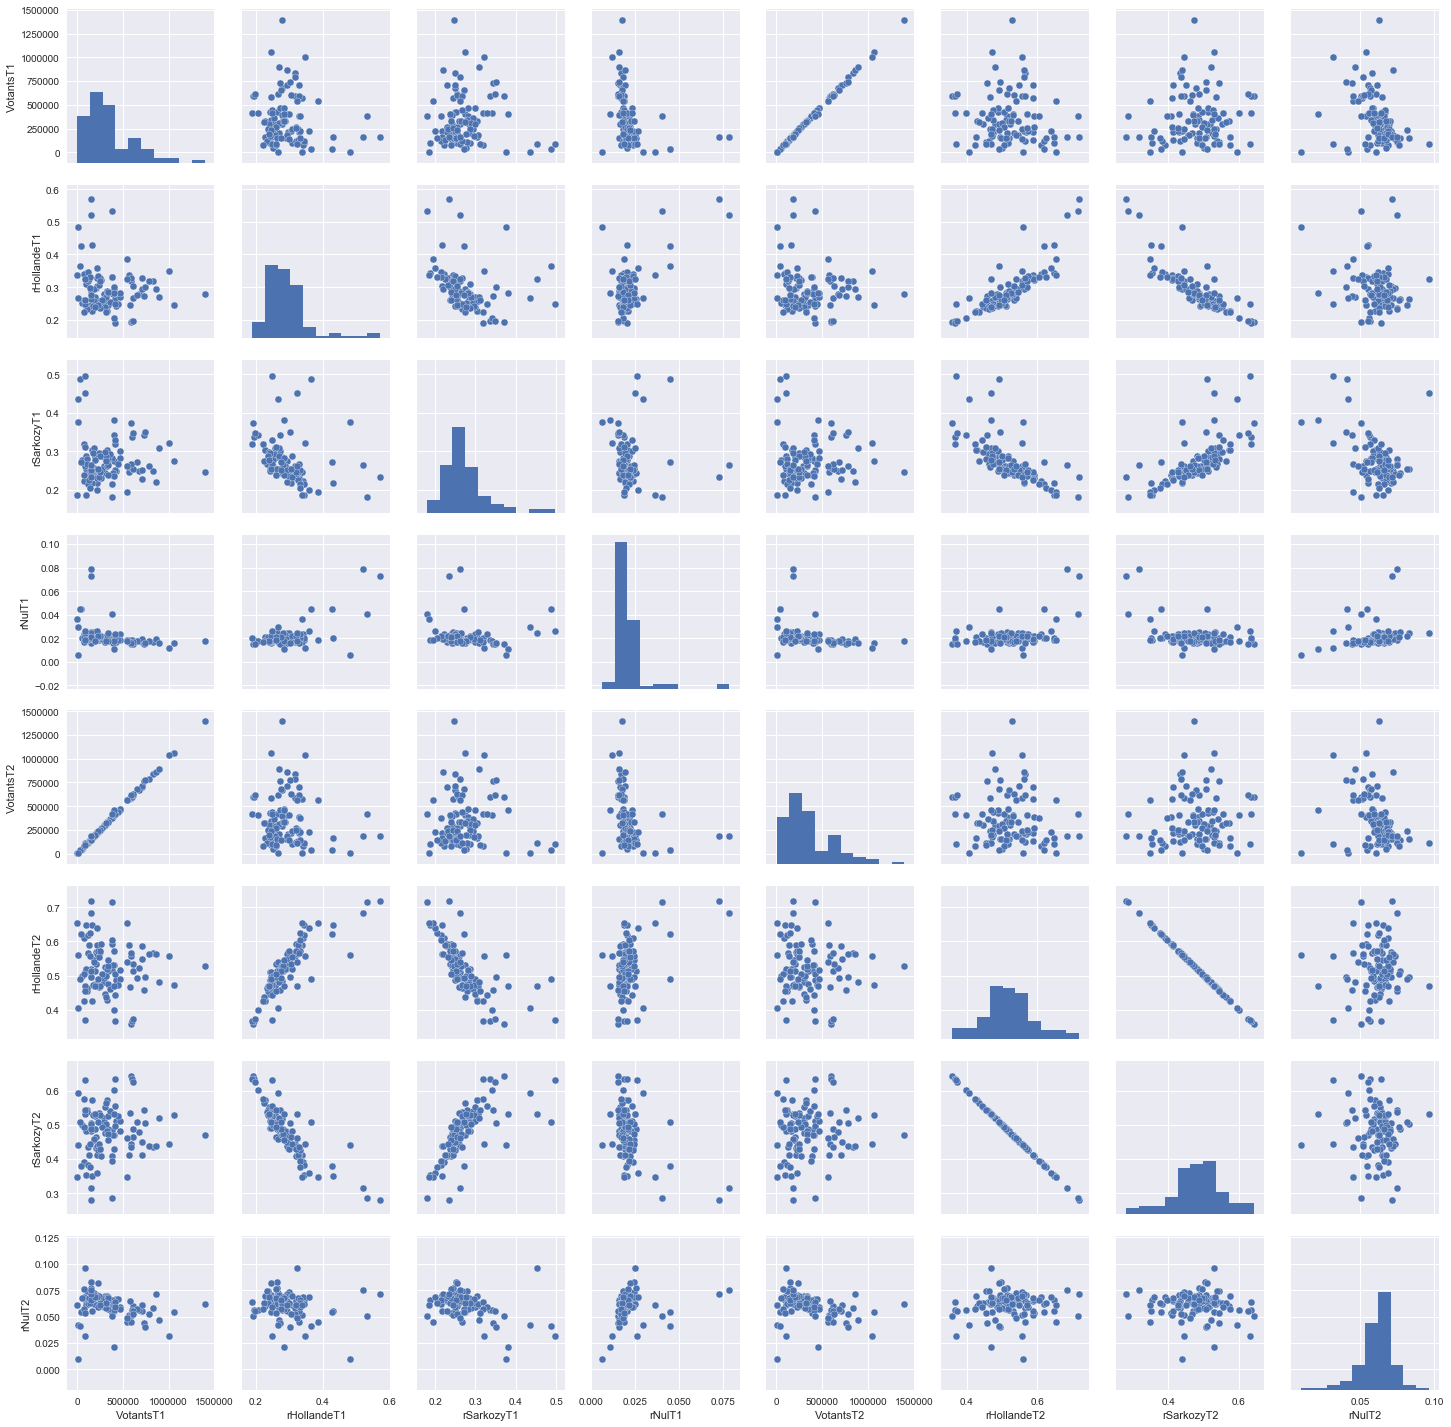

In [ ]:
import seaborn
seaborn.pairplot(data_elections)

Celui-ci est aussi intéressant : [clustermap](http://stanford.edu/~mwaskom/software/seaborn/examples/structured_heatmap.html) pour étudier les corrélations.

c:\python35_x64\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


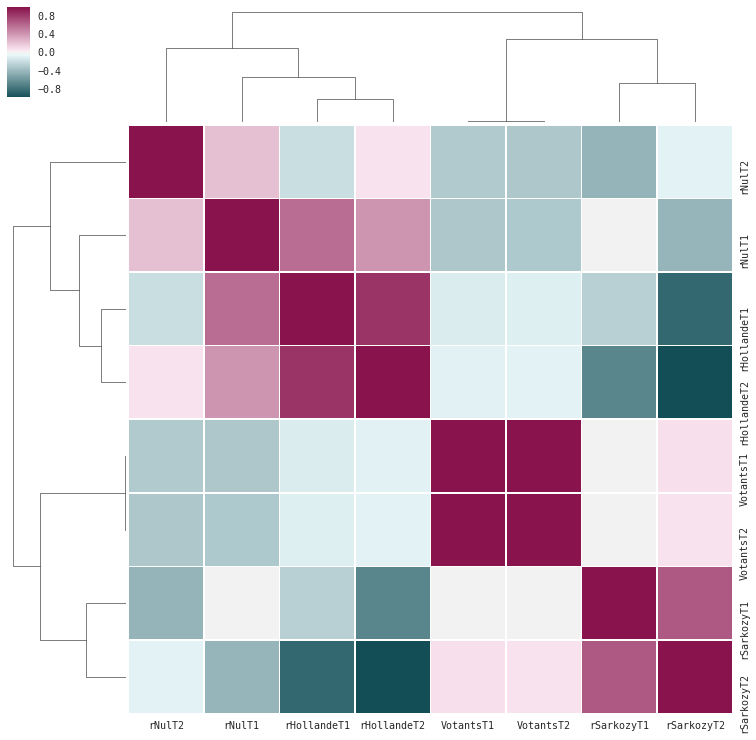

In [ ]:
import seaborn
seaborn.set(font="monospace")

cmap = seaborn.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

seaborn.clustermap(data_elections.corr(), linewidths=.5, figsize=(13, 13), cmap=cmap)

## bokeh

[bokeh](http://bokeh.pydata.org/en/latest/) propose des graphiques en javascript. La [gallerie](http://bokeh.pydata.org/en/latest/docs/gallery.html) est moins fournie que celle de matplotib. Le principale avantage de bokeh est de proposer gaphiques zoomables (interactifs).

### initialisation

La première étape est de signifier que la sortie se fera dans un notebook.

In [ ]:
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

### premier graphe

On utilise bokeh pour un simple graphique XY. on peut choisir les différentes options interactives, zoom ... Voir [tools](http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#specifying-tools).

In [ ]:
from bokeh.plotting import figure, show

p = figure(title = "élections")
p.title.text = "élections"
p.circle(data_elections["rHollandeT1"], data_elections["rHollandeT2"], color="red", fill_alpha=0.2, size=10, legend="H")
p.circle(data_elections["rSarkozyT1"], data_elections["rSarkozyT2"], color="blue", fill_alpha=0.2, size=10, legend="S")
p.line([0.2,0.7], [0.2,0.7], line_color="green", line_dash="dashed")
p.xaxis.axis_label = "tour 1"
p.yaxis.axis_label = "tour 2"
show(p)

### ajouter du texte

Les différents éléments qu'on peut ajouter au graphe s'appelle des [Glyphes](http://bokeh.pydata.org/en/latest/docs/reference/bokehjs.html). La documentation manque parfois de précision. Pour la fonction [text](http://bokeh.pydata.org/en/latest/docs/reference/bokehjs.html#text), il faut préciser le texte à afficher sous forme de liste.

In [ ]:
from bokeh.plotting import figure, show

p = figure(title = "élections")
p.title.text = "élections"
p.circle(data_elections["rHollandeT1"], data_elections["rHollandeT2"], color="red", fill_alpha=0.2, size=10, legend="H")
p.circle(data_elections["rSarkozyT1"], data_elections["rSarkozyT2"], color="blue", fill_alpha=0.2, size=10, legend="S")
p.line([0.2,0.7], [0.2,0.7], line_color="green", line_dash="dashed")
p.xaxis.axis_label = "tour 1"
p.yaxis.axis_label = "tour 2"


def display_text(p, row):
    p.text(x=row["rHollandeT1"], y=row["rHollandeT2"], text=[row["Libellé du départementT1"]],
          text_font_size="8pt", color="black", text_align="left", text_baseline="middle", angle=0)
    return row["Libellé du départementT1"]

data_elections.apply(lambda row: display_text(p, row), axis=1)

show(p)

### composition de graphes

Voir [linked brushing](http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#linked-brushing).

In [ ]:
from bokeh.plotting import figure, show, gridplot
size = 400

ph = figure(title = "élections", width=size, height=size)
ph.title.text = "élections"
ph.circle(data_elections["rHollandeT1"], data_elections["rHollandeT2"], color="red", fill_alpha=0.2, size=10, legend="H")
ph.line([0.2,0.7], [0.2,0.7], line_color="green", line_dash="dashed")
ph.xaxis.axis_label = "tour 1"
ph.yaxis.axis_label = "tour 2"

ps = figure(title = "élections", width=size, height=size)
ps.title.text = "élections"
ps.circle(data_elections["rSarkozyT1"], data_elections["rSarkozyT2"], color="blue", fill_alpha=0.2, size=10, legend="S")
ps.line([0.2,0.7], [0.2,0.7], line_color="green", line_dash="dashed")
ps.xaxis.axis_label = "tour 1"
ps.yaxis.axis_label = "tour 2"

p = gridplot([[ph, ps]])

show(p)

### interactions avec bokeh

Tout est expliqué dans la page [interaction](http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html).


In [ ]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import show
from bokeh.plotting import figure

ph = figure(title="élections")
ph.circle(data_elections["rHollandeT1"], data_elections["rHollandeT2"], color="red", fill_alpha=0.2, size=10, legend="H")
ph.line([0.2,0.7], [0.2,0.7], line_color="green", line_dash="dashed")
ph.xaxis.axis_label = "tour 1"
ph.yaxis.axis_label = "tour 2"

ps = figure(title = "élections")
ps.title.text = "élections"
ps.circle(data_elections["rSarkozyT1"], data_elections["rSarkozyT2"], color="blue", fill_alpha=0.2, size=10, legend="S")
ps.line([0.2,0.7], [0.2,0.7], line_color="green", line_dash="dashed")
ps.xaxis.axis_label = "tour 1"
ps.yaxis.axis_label = "tour 2"

tab1 = Panel(child=ph, title="Hollande")
tab2 = Panel(child=ps, title="Sarkozy")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)

Si on connaît un peu de javascript, on peut créer des graphes qui peuvent interagir avec la souris à n'importe quel endroit du graphe.

## interaction avec matplotlib (ou bokeh)

### dropdown

Le module [interact](https://github.com/ipython/ipywidgets) permet de changer le contenu d'une cellule en fonction d'un bouton, d'une barre de défilement... Le code de cette fonction est sur [github](https://github.com/ipython/ipywidgets/blob/master/ipywidgets/widgets/interaction.py). La liste des widget possible est dans le notebook [WidgetList](https://github.com/ipython/ipywidgets/blob/477cb8046e3217b134762f53c66816c45d688a20/examples/Widget%20List.ipynb)

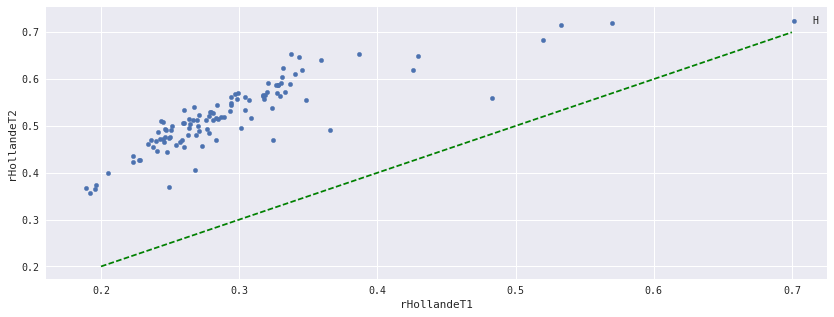

In [ ]:
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, Dropdown

def plot(cand):
    
    fig, axes = plt.subplots(1, 1, figsize=(14,5), sharey=True)
    if cand=="Hollande":
        data_elections.plot(x="rHollandeT1", y="rHollandeT2", kind="scatter", label="H", ax=axes)
    else:
        data_elections.plot(x="rSarkozyT1", y="rSarkozyT2", kind="scatter", label="S", ax=axes, c="red")
    axes.plot([0.2,0.7], [0.2,0.7], "g--")
    return axes

cand = Dropdown(options=['Hollande', 'Sarkozy'], value='Hollande', description='candidat')

interact(plot, cand=cand)
print("")

Ces interactions ne sont pas limitées à matplotlib. Tout type de sortie peut dépendre d'un *widget*.

### exercice 4 : même code, widget différent 

## autres options

Il existe un grande nombre de modules permettant de dessiner. Les plus récents utilisent le javascript.

* static

    * [ggplot](http://ggplot.yhathq.com/) : aspect similare à matplotlib version ggplot mais la syntaxe est différente

* Javascript

    * [pygal](http://www.pygal.org/en/latest/) : voir exemple plus bas, aspect réussi, le module prévoit une extension pour les [carte](http://www.pygal.org/en/latest/documentation/types/maps/pygal_maps_fr.html), le résultat nécessite l'ajout de quelques scripts Javascript
    * [mpld3](http://mpld3.github.io/) : créer un graphe avec la syntaxe Javascript et le transformer en Javascript
    * [folium](https://github.com/python-visualization/folium) : Javascript + [OpenStreetMap](https://www.openstreetmap.org/)


In [ ]:
html_pygal = """<script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
<script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
{pygal_render}
"""

from IPython.core.display import HTML
import pygal
xy_chart = pygal.XY(stroke=False)
xy_chart.title = 'Elections 2012'
xy = list(zip(data_elections["rHollandeT1"], data_elections["rHollandeT2"]))
xy_chart.add('H', xy)
HTML(html_pygal.format(pygal_render=xy_chart.render().decode()))